The mnist digit recognition is the very first algorithm to write for machine learning

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('data/mnist_data/',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist_data/t10k-labels-idx1-ubyte.gz


See what was downloaded

In [4]:
%ls data/mnist_data

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


Access the data and see what's in it

In [5]:
training_digits,training_labels = mnist.train.next_batch(5000)
test_digits, test_labels = mnist.test.next_batch(200)

In [6]:
print(training_digits.shape)
print(training_labels.shape)
print(training_digits,training_labels)


(5000, 784)
(5000, 10)
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]]))


These data will be used as inputs to the model , so let's create placeholders for them, as well as :
1. Define the cost
2. Create optimizer, that  minimizes this cost
3. Batch up the training set and looping through it, while fitting the parameters W and b by running the optimizer

Extracting data/mnist_data/train-images-idx3-ubyte.gz
Extracting data/mnist_data/train-labels-idx1-ubyte.gz
Extracting data/mnist_data/t10k-images-idx3-ubyte.gz
Extracting data/mnist_data/t10k-labels-idx1-ubyte.gz
Optimization Finished!
('Train Accuracy:', 0.9048909)
('Test Accuracy:', 0.909)
The recognized digit is [0]


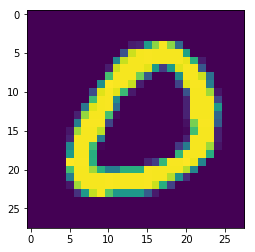

In [9]:

learning_rate=0.01
batch_size=100
display_step = 1
mnist = input_data.read_data_sets('data/mnist_data/',one_hot=True)

X=tf.placeholder(dtype=tf.float32,shape=[None,784], name='X')
Y=tf.placeholder(dtype=tf.float32,shape=[None,10], name='Y')

W = tf.Variable(tf.zeros([784,10]),name='W')
b= tf.Variable(tf.zeros([10]),name='b')


Z=tf.matmul(X,W) +b
A=tf.nn.softmax(Z)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(A)))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    batch_index=0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, batch_cost = sess.run([train_step, cost], feed_dict={X:batch_xs,Y:batch_ys}) 
        batch_index +=1
        #print("Batch:", '%04d' % (batch_index), "cost=", "{:.9f}".format(batch_cost))                        
    print("Optimization Finished!")     
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(A, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    print("Train Accuracy:", accuracy.eval({X: mnist.train.images, Y: mnist.train.labels}))
    print("Test Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    image=mnist.train.images[600]
    result=sess.run(tf.argmax(A,axis=1),feed_dict={X:image.reshape(1,784)})
    print("The recognized digit is {}".format(result))
    plt.imshow(image.reshape(28,28))
    
writer = tf.summary.FileWriter('./tbout/mnist1',sess.graph)
writer.close()                

# Cross Entropy Cost Function

We've got to abandon the Mean Squared cost function because it slows down learning. We want a cost function that that learns quickly when the model is a lot wrong and slows down when the model is not that wrong

Here's the best explaination for this - 

http://neuralnetworksanddeeplearning.com/chap3.html#the_cross-entropy_cost_function

Entropy - disorder, uncertainty. If there is no uncertainty there is no information, e.g. if it always is sunny, if the weather forecast says it's sunny - there is not much information gained from it. 
    
    `Entropy = amount of information.`  
 


E.g. 

Assuming a known distribution of AB - 100% A and 0% B, how much information do you get when I tell you it's A?
    
    You've always know it'll be A because the distribution is 100% A, so it's not a surprise it's A, therefore you get 0 bit of information
    
    
Assuming a known distribution of AB - 50% A and 50% B, how much information do you get when I tell you it's A?
    
    It could have be A or B - if I predicted it I could only gotten it right half the time - I've got to ask one question before I am certain ( is it A or B ). So I've got 1 bit of information 
        
    
Assuming a known distribution of ABC&D - 25% of A, 25% of B, 25% of C and 25% D, 
    
    I could only have get a right outcome for sure after 2 questions, e.g. 
    
    1-Is it A or B? 
        Yes - is it A? 
              Yes - it's A 
              No - it's B
        No - is it C?
             Yes - it's C
             No - it's D
             
    I get 2 bit of information.
    
Assuming a know weather distribution of 75% sunny and 25% rainy,

    When it's forecasted that it's going to rain tomorrow, my uncertainty has been reduced by a factor of 4(1/0.25) or I get 2 bit of information also give by log2 4 or -log2 p
  
What is the amount information you'll get from the weather forecast on average ?

    -0.25*log2(0.25)-0.75log2(0.75)=0.81

This is entropy, in general the entropy is, 
    
    `H(p)=-np.sum(p*np.log2(p))`

It's a measure of average information received or the unpredictability of the probablity distribution

Cross entropy refers to the entropy calculated using the true distribution and the predicted distribution :

    `H(p,q)=-np.sum(p*np.log2(q))` - p - true distribution and q - predicted distribution
    
https://www.youtube.com/watch?v=ErfnhcEV1O8

# Saving the parameters ( variables in tensorflow )

We'd want to be able to save the parameters and then use them for predictions, so let's train the model and save it here


In [8]:
tf.reset_default_graph()
learning_rate=0.01
batch_size=100
display_step = 1
X=tf.placeholder(dtype=tf.float32,shape=[None,784], name='X')
Y=tf.placeholder(dtype=tf.float32,shape=[None,10], name='Y')

W = tf.Variable(tf.zeros([784,10]),name='W')
b= tf.Variable(tf.zeros([10]),name='b')

Z=tf.matmul(X,W) +b
A=tf.nn.softmax(Z)
mnist = input_data.read_data_sets('data/mnist_data/',one_hot=True)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(A), axis=-1))

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    batch_index=0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, batch_cost = sess.run([train_step, cost], feed_dict={X:batch_xs,Y:batch_ys}) 
        batch_index +=1
        #print("Batch:", '%04d' % (batch_index), "cost=", "{:.9f}".format(batch_cost))                        
            
    print("Optimization Finished!")     
   
    # Test model
    correct_prediction = tf.equal(tf.argmax(A, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print("Train Accuracy:", accuracy.eval({X: mnist.train.images, Y: mnist.train.labels}))
    print("Test Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    saver = tf.train.Saver() 
    model_path=saver.save(sess, "./tbout/models/model.ckpt")
    print ( 'Saving model to {}'.format(model_path) )
    
writer = tf.summary.FileWriter('./tbout/mnist2',sess.graph)
writer.close()    

Extracting data/mnist_data/train-images-idx3-ubyte.gz
Extracting data/mnist_data/train-labels-idx1-ubyte.gz
Extracting data/mnist_data/t10k-images-idx3-ubyte.gz
Extracting data/mnist_data/t10k-labels-idx1-ubyte.gz


MemoryError: 

Now let's retrieve it and use it for prediction

INFO:tensorflow:Restoring parameters from ./tbout/models/model.ckpt
[-0.03748076  0.08087784 -0.01937952 -0.0207708   0.01952291  0.02983976
 -0.01153679  0.03211228 -0.06757122 -0.00561367]
The recognized digit is [0]


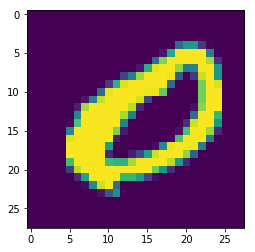

In [11]:
tf.reset_default_graph()
W = tf.get_variable("W", shape=[784,10])
b = tf.get_variable("b", shape=[10])
X=tf.placeholder(dtype=tf.float32,shape=[None,784], name='X')
Y=tf.placeholder(dtype=tf.float32,shape=[None,10], name='Y')
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.Saver() 
    saver.restore(sess, "./tbout/models/model.ckpt")

    print(b.eval())

    Z=tf.matmul(X,W) +b
    A=tf.nn.softmax(Z)

    image=mnist.train.images[600]
    result=sess.run(tf.argmax(A,axis=1),feed_dict={X:image.reshape(1,784)})
    print("The recognized digit is {}".format(result))
    plt.imshow(image.reshape(28,28))
